In [59]:
import pandas as pd
import numpy as np

In [95]:


activities = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/activitats.csv", encoding='ISO-8859-1')
marks = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/notes.csv", delimiter=';')
submision = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/trameses.csv")



In [14]:
user_31 = submision[(submision["userid"] == 31) & (submision["activitat_id"] == 362)]
user_31 = user_31.fillna(-1)
user_31 = user_31.sort_values(by=['datesubmitted']).copy()
user_31['attempt_number'] = user_31.groupby('userid').cumcount() + 1
user_31 = user_31[(user_31["grade"] == user_31["grade"].max()) & (user_31["dategraded"] == user_31["dategraded"].min())]



In [16]:
# Filtrar por usuario y actividad específica
user_31 = submision[(submision["userid"] == 31) & (submision["activitat_id"] == 362)]

# Llenar valores NaN con -1
user_31 = user_31.fillna(-1)

# Ordenar por fecha de entrega
user_31 = user_31.sort_values(by=['datesubmitted']).copy()

# Añadir el número de intento
user_31['attempt_number'] = user_31.groupby('userid').cumcount() + 1

# Obtener la nota máxima primero, luego filtrar por la fecha de evaluación más temprana
max_grade = user_31["grade"].max()
earliest_dategraded = user_31[user_31["grade"] == max_grade]["dategraded"].min()

# Filtrar el DataFrame final por estas condiciones
user_31 = user_31[(user_31["grade"] == max_grade) & (user_31["dategraded"] == earliest_dategraded)]

user_31

,id,activitat_id,userid,datesubmitted,grader,dategraded,grade,nevaluations,attempt_number
4,16,362,31,2022-09-07 07:59:53,0,"1,662,712,109",100,0,2


In [105]:
submision = pd.read_csv("./../../data/trameses.csv")

# Llenar NaN con -1 (si es necesario)
submision['grade'] = submision['grade'].fillna(-1)

# Ordenar por usuario, actividad, fecha de entrega para asegurar el orden de intentos
submision = submision.sort_values(by=['userid', 'activitat_id', 'datesubmitted'])

# Añadir el número de intento por usuario y actividad
submision['attempt_number'] = submision.groupby(['userid', 'activitat_id']).cumcount() + 1

# Ordenar por usuario, actividad, calificación (descendente) y fecha de evaluación (ascendente)
submision = submision.sort_values(by=['userid', 'activitat_id', 'grade', 'dategraded'], ascending=[True, True, False, True])

# Mantener solo el primer registro de cada usuario y actividad después de ordenar
submision = submision.drop_duplicates(subset=['userid', 'activitat_id'], keep='first')

In [115]:
activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
activities['num_activities'] = activities.groupby('aula_id')['activitat_id'].transform('count')

submision_activities = submision.merge(activities, on=['activitat_id'], how='left')

submision_activities["mark"] = submision_activities["grade_x"].astype(float) / submision_activities["grade_y"].astype(float)
activities

,activitat_id,activitat,aula_id,startdate,duedate,grade,num_activities
0,3,Problema 1.1 - Hello world!!!,87,0,0,100,213
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100,213
2,5,Problema 3a.1: Càlcul edat,87,0,0,100,213
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100,213
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100,213
...,...,...,...,...,...,...,...
1796,4194,(OPCIONAL) Problema 9.24 Triple pitagòric,184,0,0,100,232
1797,4379,VPLParent,114,0,0,10,146
1798,4380,VPL Child - Duplicate Me as Needed,114,0,0,10,146
1799,4386,Lliurament Pràctica 5: NEW La Major,176,1571985000,1576745700,100,176


In [116]:
activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
activities[activities["aula_id"] == 87]

,activitat_id,activitat,aula_id,startdate,duedate,grade
0,3,Problema 1.1 - Hello world!!!,87,0,0,100
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100
2,5,Problema 3a.1: Càlcul edat,87,0,0,100
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100
...,...,...,...,...,...,...
208,215,Problema 8.1: Classe Point,87,0,0,100
209,216,Problema 8.2: Classe Rectangle,87,0,0,100
210,217,Problema 5a.3: Nombre d'aprovats,87,0,0,100
499,1652,RECUPERACIO - Lliurament Pràctica 2: Hotels,87,0,1676069700,100


In [106]:
marks = pd.read_csv("./../../data/notes.csv", delimiter=';')

submision_activities_marks = marks.merge(submision_activities, on=['userid','aula_id'], how='left')
submision_activities_marks["NOT_Presented_P"] = np.where(submision_activities_marks['P_Grade_Date'].notnull() & submision_activities_marks['P_Grade'].isnull(), 1, 0)
submision_activities_marks["NOT_Presented_F"] = np.where(submision_activities_marks['F_Grade_Date'].notnull() & submision_activities_marks['F_Grade'].isnull(), 1, 0)
submision_activities_marks["NOT_Presented_R"] = np.where(submision_activities_marks['R_Grade_Date'].notnull() & submision_activities_marks['R_Grade'].isnull(), 1, 0)

submision_activities_marks["P_Grade_Date"] = pd.to_datetime(submision_activities_marks['P_Grade_Date'], unit='s')
submision_activities_marks["F_Grade_Date"] = pd.to_datetime(submision_activities_marks['F_Grade_Date'], unit='s')
submision_activities_marks["R_Grade_Date"] = pd.to_datetime(submision_activities_marks['R_Grade_Date'], unit='s')

submision_activities_marks["datesubmitted"] = pd.to_datetime(submision_activities_marks['datesubmitted'], unit='s')
submision_activities_marks["dategraded"] = pd.to_datetime(submision_activities_marks['dategraded'], unit='s')
submision_activities_marks["startdate"] = pd.to_datetime(submision_activities_marks['startdate'], unit='s')
submision_activities_marks["duedate"] = pd.to_datetime(submision_activities_marks['duedate'], unit='s')
submision_activities_marks.columns

Index(['userid', 'aula_id', 'P_Grade', 'P_Grade_Date', 'F_Grade',
       'F_Grade_Date', 'R_Grade', 'R_Grade_Date', 'id', 'activitat_id',
       'datesubmitted', 'grader', 'dategraded', 'grade_x', 'nevaluations',
       'attempt_number', 'activitat', 'startdate', 'duedate', 'grade_y',
       'mark', 'NOT_Presented_P', 'NOT_Presented_F', 'NOT_Presented_R'],
      dtype='object')

In [103]:
dataset = submision_activities_marks[["userid", "aula_id", "activitat_id", "activitat", "startdate", "duedate", "datesubmitted", "dategraded", "attempt_number", "mark", "NOT_Presented_P", "P_Grade", "P_Grade_Date", "NOT_Presented_F", "F_Grade", "F_Grade_Date", "NOT_Presented_R", "R_Grade", "R_Grade_Date"]]

,userid,aula_id,activitat_id,activitat,startdate,duedate,datesubmitted,dategraded,attempt_number,mark,NOT_Presented_P,P_Grade,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date
0,176,92,362,Problema 1.1 - Hello world!!!,1970-01-01,1970-01-01,2022-09-13 20:21:49,2022-09-13 20:34:59,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
1,176,92,363,Problema 1.2 - Hello world!!! ++,1970-01-01,1970-01-01,2022-09-13 20:41:13,2022-09-13 20:41:22,4,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
2,176,92,366,Problema 3a.1: Càlcul edat,1970-01-01,1970-01-01,2022-09-16 07:18:17,2022-09-16 07:18:44,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
3,176,92,367,Problema 3a.8: Conversió dòlars a euros,1970-01-01,1970-01-01,2022-09-16 07:29:53,2022-09-16 07:29:57,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
4,176,92,368,Problema 3a.11: Mitjana de notes,1970-01-01,1970-01-01,2022-09-16 07:19:27,2022-09-16 07:19:55,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101283,2984,184,"3,880",Problema 5.7: Centenes d'un nombre,1970-01-01,1970-01-01,2024-10-20 12:40:25,2024-10-20 12:40:29,1,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101284,2984,184,"3,882",Problema 5.13: Sèrie de Fibonacci,1970-01-01,1970-01-01,2024-10-20 12:49:00,2024-10-20 12:49:02,2,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101285,2984,184,"3,887",Problema 5.3: Alerta,1970-01-01,1970-01-01,2024-10-20 13:03:58,2024-10-20 13:04:06,1,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101286,2984,184,"3,890",Problema 5.4: Temps d'execució,1970-01-01,1970-01-01,2024-10-21 06:26:41,1970-01-01 00:00:00,1,-0,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00


In [107]:
dataset.to_csv('./../../data/dataset.csv', index=False)


In [139]:
dataset = pd.read_csv('./../../data/dataset.csv', low_memory=False)
aa = dataset[(dataset["userid"] == 168) & (dataset["aula_id"] == 92)]["attempt_number"]
aa.to_list()
aa.mean()

6.198275862068965

In [140]:
dataset_model = pd.read_csv('./../../data/dataset.csv', low_memory=False)
# Reemplazar NaN en 'attempt_number' con 10
dataset_model['attempt_number'] = dataset_model['attempt_number'].fillna(10)
dataset_model['attempt_number'] = dataset_model['attempt_number'].astype("float")

# Agrupar por 'activitat_id' y calcular la media de 'attempt_number'
dataset_model['average_attempt_number'] = dataset_model.groupby(['userid', 'aula_id'])['attempt_number'].transform('mean')
dataset_model['average_mark'] = dataset_model.groupby(['userid', 'aula_id'])['mark'].transform('mean')

dataset_model
# Renombrar la columna de media si es necesario
dataset_model = dataset_model[["userid", "aula_id", "average_attempt_number", "average_mark", "NOT_Presented_P", "P_Grade", "P_Grade_Date", "NOT_Presented_F", "F_Grade", "F_Grade_Date", "NOT_Presented_R", "R_Grade", "R_Grade_Date", "rank_P", "rank_F", "rank_R"]]
dataset_model = dataset_model.drop_duplicates()
dataset_model

,userid,aula_id,average_attempt_number,average_mark,NOT_Presented_P,P_Grade,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date,rank_P,rank_F,rank_R
0,176,92,3,1,0,NaN,NaN,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3,NaN
104,179,92,3,1,0,NaN,NaN,0,"7,75",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,9,NaN
208,168,92,6,1,0,NaN,NaN,0,"7,75",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,9,NaN
324,401,92,4,1,0,NaN,NaN,0,"3,50",2022-11-07 14:00:00,0,"8,25",2023-01-31 14:00:00,NaN,24,3
445,482,92,3,1,0,NaN,NaN,0,"7,00",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100993,2818,184,2,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101034,2822,184,3,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101114,2836,184,3,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101137,2982,184,3,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN


TypeError: 'value' must be an instance of str or bytes, not a float

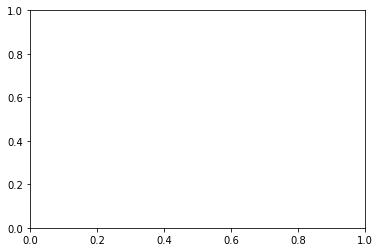

In [142]:
import matplotlib.pyplot as plt

plt.scatter(dataset_model["P_Grade"], dataset_model["F_Grade"], color='b', marker='o')

# Añadir títulos y etiquetas
plt.title('Gráfica de Puntos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar gráfica
plt.show()